In [4]:
!pip install -q spotipy
import pandas as pd
import numpy as np
df = pd.read_csv('/content/music_sentiment_dataset.csv').astype({
    'valence_tags': np.float32,
    'arousal_tags': np.float32,
    'dominance_tags': np.float32
})


In [5]:
df.describe(percentiles=[]).round(2)
df.info()

import spotipy
from spotipy import SpotifyException

random_sample = df.dropna(subset=['spotify_id']).sample(1)

track = random_sample['track'].tolist()[0]
artist = random_sample['artist'].tolist()[0]
genre = random_sample['genre'].tolist()[0]
spotify_id = random_sample['spotify_id'].tolist()[0]

print(f'artist: {artist}\ntrack: {track}\ngenre: {genre}\nspotify_id: {spotify_id}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lastfm_url              1000 non-null   object 
 1   track                   1000 non-null   object 
 2   artist                  1000 non-null   object 
 3   seeds                   1000 non-null   object 
 4   number_of_emotion_tags  1000 non-null   int64  
 5   valence_tags            1000 non-null   float32
 6   arousal_tags            1000 non-null   float32
 7   dominance_tags          1000 non-null   float32
 8   mbid                    1000 non-null   object 
 9   spotify_id              1000 non-null   object 
 10  genre                   1000 non-null   object 
dtypes: float32(3), int64(1), object(7)
memory usage: 74.3+ KB
artist: The Weeknd
track: Blinding Lights
genre: Pop
spotify_id: 1alf1gfgs0k6f4f0n6vq9i


In [ ]:
import json
import spotipy
import webbrowser
from spotipy.oauth2 import SpotifyOAuth

clientID = '3a7e4b8018d447578dd446f86c3ce259'
clientSecret = '6210d8778c944b40a39e4645ae6bdfb1'
redirect_uri = 'http://localhost:8000/callback'

oauth_object = spotipy.SpotifyOAuth(clientID, clientSecret, redirect_uri)
token_dict = oauth_object.get_access_token()
token = token_dict['access_token']
spotifyObject = spotipy.Spotify(auth=token)
user_name = spotifyObject.current_user()

print(json.dumps(user_name, sort_keys=True, indent=4))

search_song = track
results = spotifyObject.search(search_song, 1, 0, "track")
songs_dict = results['tracks']
song_items = songs_dict['items']
song = song_items[0]['external_urls']['spotify']

webbrowser.open(song)
print('Song has opened in your browser.')

/tmp/ipython-input-3037861691.py:11: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_dict = oauth_object.get_access_token()


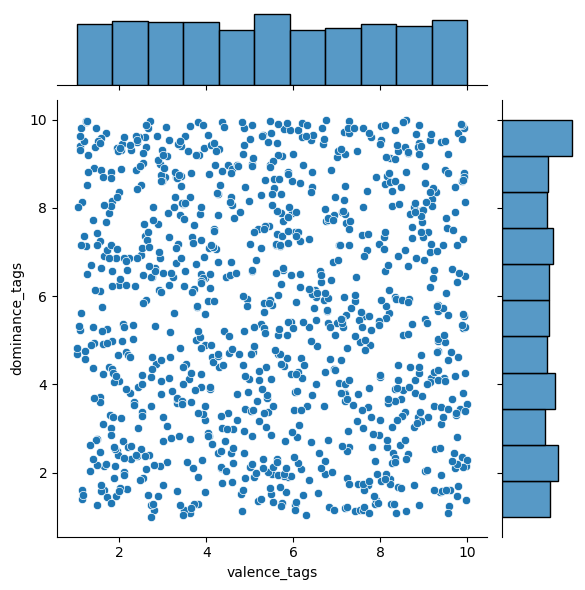

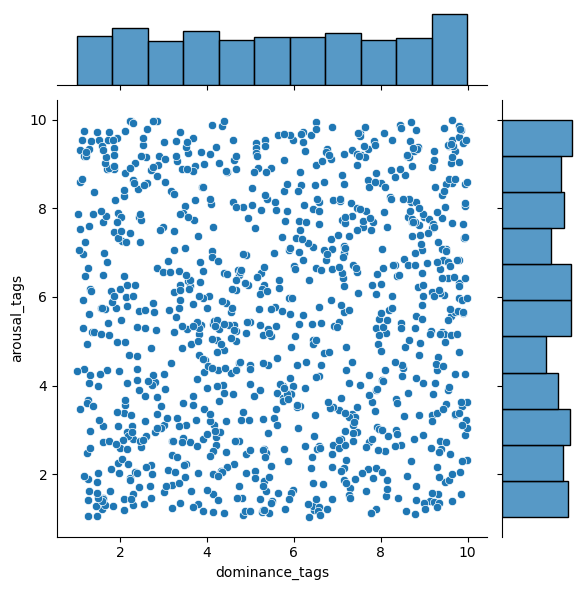

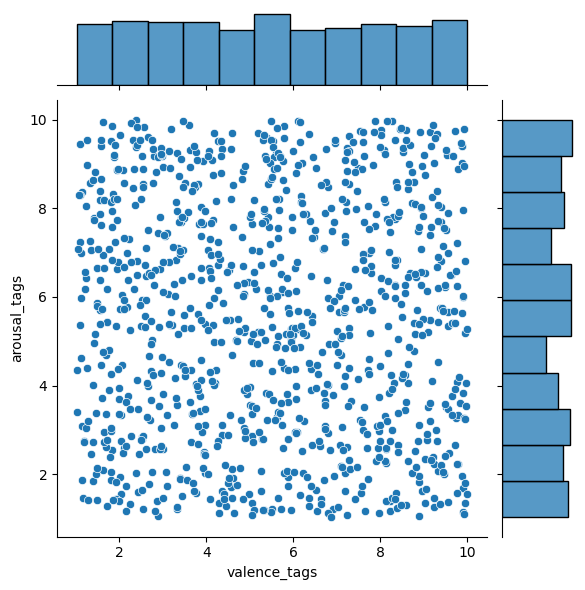

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.jointplot(x='valence_tags', y='dominance_tags', data=df, kind='scatter')
plt.show()

sb.jointplot(x='dominance_tags', y='arousal_tags', data=df, kind='scatter')
plt.show()

sb.jointplot(x='valence_tags', y='arousal_tags', data=df, kind='scatter')
plt.show()

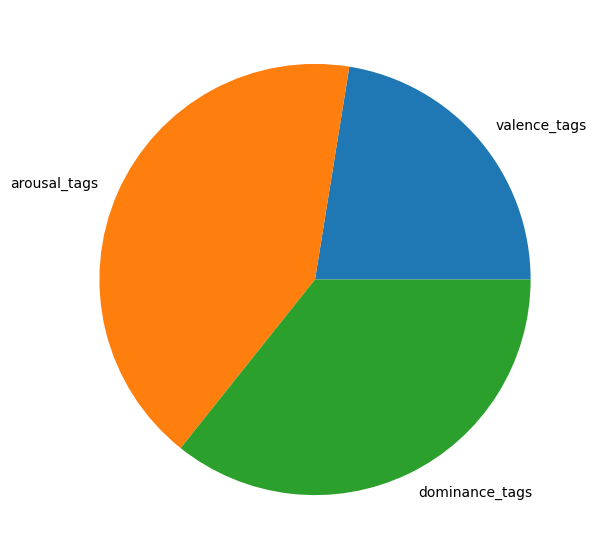

In [16]:
from matplotlib import pyplot as plt
import numpy as np

track = 'Step up'
cars = ['valence_tags', 'arousal_tags', 'dominance_tags']
data = [2.97138, 5.537, 4.726]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=cars)

plt.show()